Example of Principal Component Analysis (PCA) on an artificially-correlated data set in many dimensions.  
Author: TC (thanks to Gaia)

In [4]:
%matplotlib inline
import matplotlib
import numpy
import math
import itertools
import matplotlib.pyplot as plt
import IPython
import time
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 5.0]
rcParams['figure.dpi'] = 256
#print IPython.sys_info()
#print rcParams
print 'last modified: ' + time.strftime('%c')

last modified: Thu Feb 19 19:00:40 2015


# Example for $D=2$,  with projections along PC

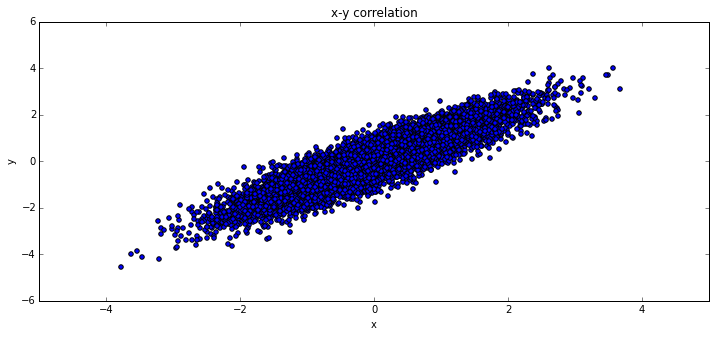

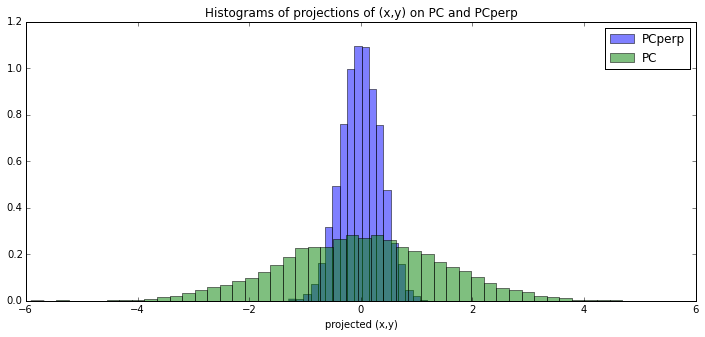

In [2]:
# number of samples
N = 10 ** 4
# build artifically-correlated samples
x = numpy.random.normal(0.0, 1.0, size=N)
y = x + numpy.random.normal(0.0, 1.0, size=N) * 0.5
# scatter-plot data
plt.scatter(x, y)
plt.title('x-y correlation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
# compute averages and variances
avx, avx2 = numpy.mean(x), numpy.mean(x ** 2)
avy, avy2 = numpy.mean(y), numpy.mean(y ** 2)
varx, vary = avx2 - avx ** 2, avy2 - avy ** 2
# build correlation matrix c
c = numpy.zeros(shape=(2, 2))
c[0, 0], c[1, 1] = 1.0, 1.0
c[0, 1] = (numpy.mean(x * y) - avx * avy) / math.sqrt(varx * vary)
c[1, 0] = c[0, 1]
# diagonalize c
evals, evects = numpy.linalg.eig(c)
# find principal component (PC) and the second eigenvector (PCperp)
if evals[0] > evals[1]: imax, imin = 0, 1
else:                   imax, imin = 1, 0
PC, PCperp = evects[:, imax], evects[:, imin]
# project (x,y) on PC and PCperp
x_PC     = PC[0] * x     + PC[1] * y
x_PCperp = PCperp[0] * x + PCperp[1] * y
# show histogram of projected points
plt.title('Histograms of projections of (x,y) on PC and PCperp')
plt.hist(x_PCperp, normed=True, bins=20, alpha=0.5, label='PCperp')
plt.hist(x_PC,     normed=True, bins=50, alpha=0.5, label='PC')
plt.xlabel('projected (x,y)')
plt.legend()
plt.show()

Comment on the histogram: as expected, the projection of data on the Principal Value has a large spread, while the projection on the orthogonal vector is more peaked.

# General case in $D$ dimensions

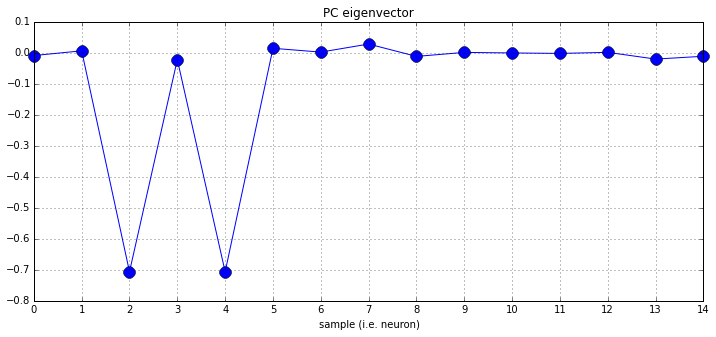

In [3]:
# number of dimensions (e.g. number of neuros)
D = 15
# number of samples (e.g. number of recorded times)
N = 10 ** 4
# build D independent samples
x = []
for i in range(D):
    x.append(numpy.random.normal(0.0, 1.0, size=N))
# artificially correlate dimensions 2 and 4
x[2] = x[4] + numpy.random.normal(0.0, 1.0, size=N) * 0.05
# compute averages and variances
av, var = [], []
for i in range(D):
    av.append(numpy.mean(x[i]))
    var.append(numpy.mean(x[i] ** 2) - av[i] ** 2)
# build correlation matrix c
c = numpy.zeros(shape=(D, D))
for i in xrange(D):
    for j in xrange(i + 1):
        c[i, j] = (numpy.mean(x[i] * x[j]) - av[i] * av[j]) / math.sqrt(var[i] * var[j])
        c[j ,i] = c[i, j]
# diagonalize c and find principal component (PC)
evals, evects = numpy.linalg.eig(c)
imax = numpy.argmax(evals)
PC = evects[:, imax]
# show PC eigenvector
plt.title('PC eigenvector')
plt.xlabel('sample (i.e. neuron)')
plt.plot(PC, 'o-', ms=12, clip_on=False)
plt.grid()
plt.xticks(range(D))
plt.show()

Comment: as expected, the two artificially-correlated samples (i.e. neurons) 2 and 4 correspond to the largest values of the PC eigenvector.